## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Loading Data

In [2]:
print("")
print("========================================================Data========================================================")
data = pd.read_csv('bank-full.csv', sep=';'  )
data.head(5)


========================================================Data========================================================


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Printing dataset size

In [3]:
print("")
print("Data-Set Size =", len(data))
print("Total Number of Attributes = ", data.shape[1])
print("")


Data-Set Size = 45211
Total Number of Attributes =  17



 *  There are 45211 distinct data points
 *  Total Attributes into consideration are - 16
 

In [4]:
print("")
print("Data-Set Size =", len(data))
print("Data Shape = ", data.shape)
print("")


Data-Set Size = 45211
Data Shape =  (45211, 17)



In [5]:
print("====Columns====")
data.columns


====Columns====


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### Checking the null value count in all the attributes 

In [7]:
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64



Using the above information we can conclude that there is no NULL value data point in any attribute.

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [9]:

data['y'].unique()


array(['no', 'yes'], dtype=object)

In [10]:
cols = [col for col in data.columns]
col_with_unknown_value = []
for col in cols:
    if 'unknown' in data[col].values:
        col_with_unknown_value.append(col)
print("")        
print("Columns with Unknown Values -",col_with_unknown_value) 
print("")


Columns with Unknown Values - ['job', 'education', 'contact', 'poutcome']



In [11]:
print("")
print("Unknown values count : \n")
for col in col_with_unknown_value:
    print(col," : ",data[data[col].str.contains('unknown')][col].count())


Unknown values count : 

job  :  288
education  :  1857
contact  :  13020
poutcome  :  36959


In [12]:
print("Other values count in attributes having unknown values -\n")
for col in col_with_unknown_value:
    print("====",col,"====")
    print(" ")
    print(data.groupby(data[col])[col].count(),"\n")

Other values count in attributes having unknown values -

==== job ====
 
job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64 

==== education ====
 
education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64 

==== contact ====
 
contact
cellular     29285
telephone     2906
unknown      13020
Name: contact, dtype: int64 

==== poutcome ====
 
poutcome
failure     4901
other       1840
success     1511
unknown    36959
Name: poutcome, dtype: int64 



## Replacing unknown values with the mode of the column

In [13]:
#data.education.replace('unknown',data.education.mode()[0],inplace=True)

data.loc[(data['age']>60) & (data['job']=='unknown'), 'job'] = 'retired'

data.loc[(data['education']=='unknown') & (data['job']=='management'), 'education'] = 'tertiary'
data.loc[(data['education']=='unknown') & (data['job']=='services'), 'education'] = 'secondary'
data.loc[(data['education']=='unknown') & (data['job']=='housemaid'), 'education'] = 'primary'

data.loc[(data['job'] == 'unknown') & (data['education']=='basic.4y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.6y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.9y'), 'job'] = 'blue-collar'
data.loc[(data['job']=='unknown') & (data['education']=='professional.course'), 'job'] = 'technician'

In [14]:
data['job'] = data.job.replace('unknown',data.job.mode()[0])

In [15]:
data['education'] = data.education.replace('unknown',data.education.mode()[0])

In [16]:
data['poutcome'] = data.education.replace('unknown',data.education.mode()[0])

In [17]:
data['contact'] = data.education.replace('unknown',data.education.mode()[0])

In [18]:
print("")
print("Unknown values count after replacement: \n")
for col in col_with_unknown_value:
    print(col," : ",data[data[col].str.contains('unknown')][col].count())


Unknown values count after replacement: 

job  :  0
education  :  0
contact  :  0
poutcome  :  0


In [19]:
print("")
print("Values count in attributes -\n")
for col in col_with_unknown_value:
    print("====",col,"====")
    print(" ")
    print(data.groupby(data[col])[col].count(),"\n")


Values count in attributes -

==== job ====
 
job
admin.           5171
blue-collar      9998
entrepreneur     1487
housemaid        1240
management       9458
retired          2286
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
Name: job, dtype: int64 

==== education ====
 
education
primary       6896
secondary    24772
tertiary     13543
Name: education, dtype: int64 

==== contact ====
 
contact
primary       6896
secondary    24772
tertiary     13543
Name: contact, dtype: int64 

==== poutcome ====
 
poutcome
primary       6896
secondary    24772
tertiary     13543
Name: poutcome, dtype: int64 



In [20]:
print("")
for i in data.columns:
    print(i," :-")    
    print(data[i].unique())
    print('==='*25)
  


age  :-
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job  :-
['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
marital  :-
['married' 'single' 'divorced']
education  :-
['tertiary' 'secondary' 'primary']
default  :-
['no' 'yes']
balance  :-
[ 2143    29     2 ...  8205 14204 16353]
housing  :-
['yes' 'no']
loan  :-
['no' 'yes']
contact  :-
['tertiary' 'secondary' 'primary']
day  :-
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month  :-
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration  :-
[ 261  151   76 ... 1298 1246 1556]
campaign  :-
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 

In [21]:
#df.describe()
#df.describe().transpose()
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [22]:
### numerical
print(" ")
print("The colomns with numerical values are : ")
numerical_cols = list(data.select_dtypes(exclude=['object']))
numerical_cols

 
The colomns with numerical values are : 


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [23]:
print(" ")
print("Data-table consisting of only numerical values :")
data[numerical_cols].head()

 
Data-table consisting of only numerical values :


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [24]:
### categorical
print("")
print("The colomns with categorical values are : ")
category_cols = list(data.select_dtypes(include=['object']))
category_cols



The colomns with categorical values are : 


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [25]:
target='y'
non_features=[target]
cat_features=[col for col in data.select_dtypes('object').columns if col not in non_features]
num_features=[col for col in data.select_dtypes(np.number).columns if col not in non_features]
print("")
print("Categorical Features :\n",cat_features,"\n")
print("Numerical Features :\n",num_features)


Categorical Features :
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] 

Numerical Features :
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [26]:
print("")
print("Data-table consisting of only categorical values :")
data[cat_features].describe()


Data-table consisting of only categorical values :


,job,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,11,3,3,2,2,2,3,12,3
top,blue-collar,married,secondary,no,yes,no,secondary,may,secondary
freq,9998,27214,24772,44396,25130,37967,24772,13766,24772


### value count of months


In [27]:
print("")
print("====Months====")
data["month"].value_counts()


====Months====


may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


Bar-plot of categorical  columns : 


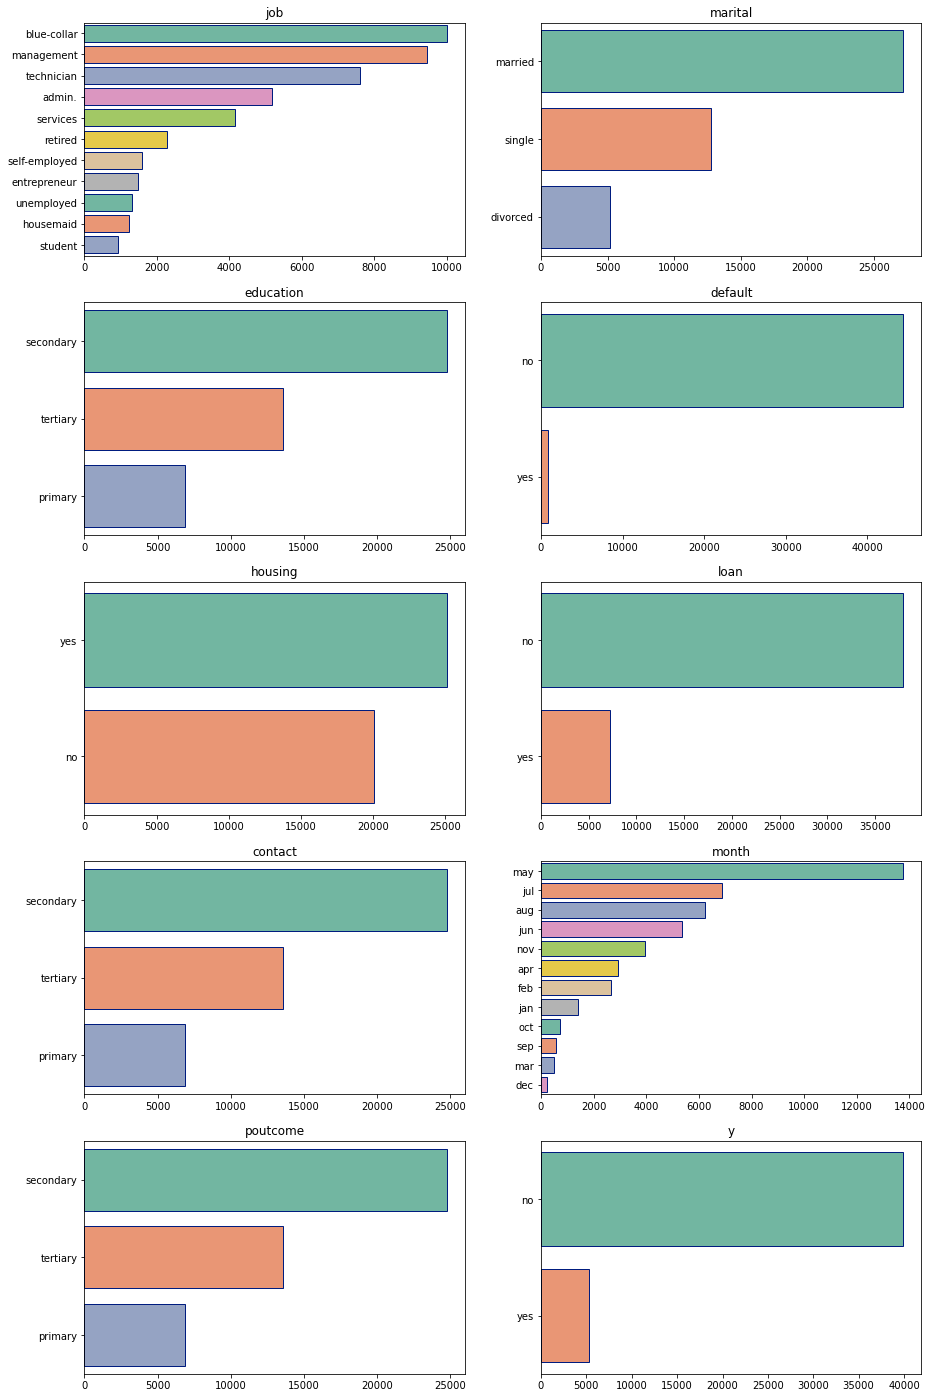

In [28]:
print("")
print("Bar-plot of categorical  columns : ")
plt.figure(figsize=(15,30))
for i,col in enumerate(category_cols,start=1):
    plt.subplot(6,2,i);
    sns.barplot(data[col].value_counts().values, data[col].value_counts().index,palette="Set2",edgecolor=sns.color_palette("dark", 1))
    plt.title(col)

###  Checking Job Class Distribution

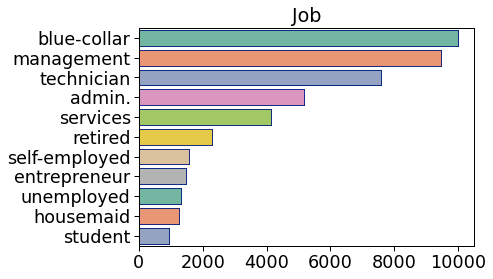

In [29]:
for i,col in enumerate(category_cols,start=1):
    sns.set_context("paper", font_scale=2)                                                  
    sns.barplot(data['job'].value_counts().values, data['job'].value_counts().index,palette="Set2",edgecolor=sns.color_palette("dark", 1))
    plt.title('Job')


The bar-plot shows that the top-5 client categories are blue-colloar, management, technician, admin and services.

###  Checking Marital Class Distribution

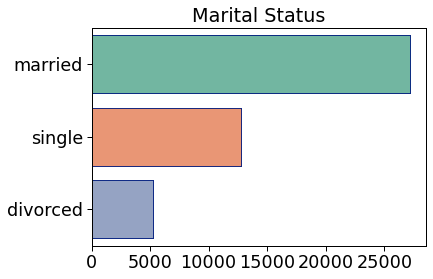

In [30]:
for i,col in enumerate(category_cols,start=1):
    sns.set_context("paper", font_scale=2)                                                  
    sns.barplot(data['marital'].value_counts().values, data['marital'].value_counts().index,palette="Set2",edgecolor=sns.color_palette("dark", 1))
    plt.title('Marital Status')

The above bar-plot shows that most cleints are of married status.

###  Checking Education Class Distribution

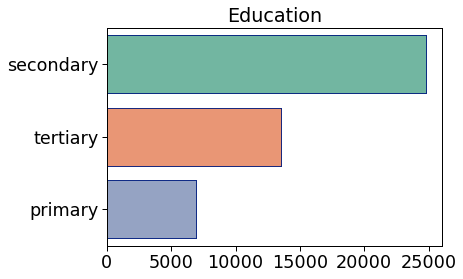

In [31]:
for i,col in enumerate(category_cols,start=1):
    sns.set_context("paper", font_scale=2)                                                  
    sns.barplot(data['education'].value_counts().values, data['education'].value_counts().index,palette="Set2",edgecolor=sns.color_palette("dark", 1))
    plt.title('Education')

The above bar-plot shows that most cleints have secondary level of education.

###  Checking Month Class Distribution

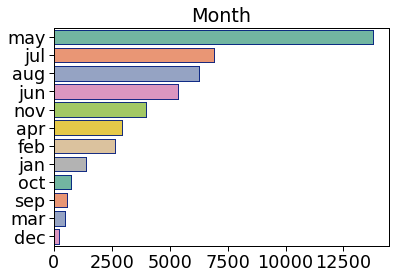

In [32]:
for i,col in enumerate(category_cols,start=1):
    sns.set_context("paper", font_scale=2)                                                  
    sns.barplot(data['month'].value_counts().values, data['month'].value_counts().index,palette="Set2",edgecolor=sns.color_palette("dark", 1))
    plt.title('Month')

The above bar-plot shows that the most cleints come in may month.


The Histogram of numerical columns : 


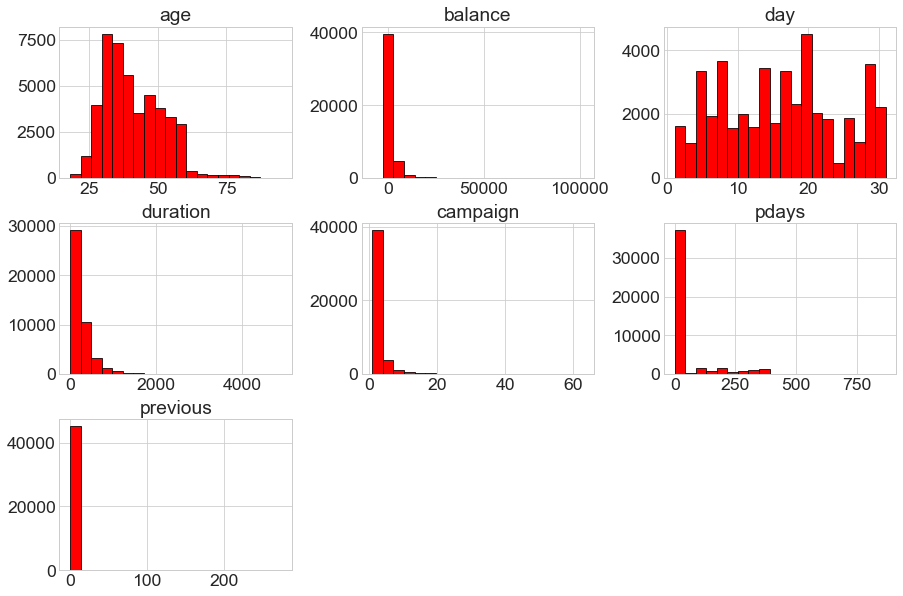

In [33]:
print("")
print("The Histogram of numerical columns : ")
plt.style.use('seaborn-whitegrid')

data.hist(bins=20, figsize=(15,10), color='red',edgecolor='black')
plt.show()

###  Checking Age Class Distribution

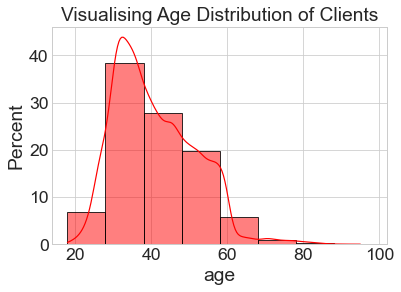

In [34]:
age_plot = sns.histplot(data=data, x="age",stat="percent", color = "red", binwidth= 10, kde=True, legend = True).set(title='Visualising Age Distribution of Clients')

The histogram class distribution for **age** variable shows that most of the dataset clients are between the ages of 25 and 55.

### Relation between top 5 client jobs and their ages

<AxesSubplot:xlabel='age', ylabel='job'>

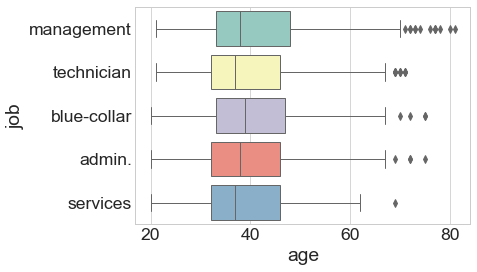

In [35]:
top_jobs = (data.job.value_counts().sort_values(ascending=False).head(5).index.values)
sns.boxplot(y="job", x="age", data=data[data.job.isin(top_jobs)], orient="h",palette="Set3", linewidth=1)

The box plot shows that among the top-5 client categories, the most senior customers represent the management, and the largest number of outliers is among the admin. and technician.

The distribution of balance: After dropping outliers in balance, the range of balance is still massive, from a minimum of -6847 to a maximum of 10443 euros, giving a range of 17290 euros. The distribution of balance has a huge standard deviation relative to the mean, suggesting large variabilities in customers' balance levels.

### The Relationship between Age and Balance

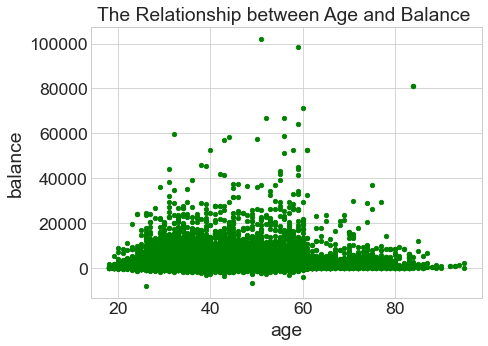

In [36]:
scatter_age_balance = data.plot.scatter('age','balance',figsize = (7,5), color ="green")

plt.title('The Relationship between Age and Balance ')
plt.show()

Using the above scatter plot we can infer there is no clear relation between a client's age and balance

We can see as the age of the customer increases their balance is decreasing and clients tend to have a significantly lower balance, mostly under 50000 euros. This could be possibly because of the retirement age being 60 and after which there is no significant source of income for majority of the people.